# Project: Investigate a Dataset (European Soccer Database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

* This soccer database comes from [Kaggle](https://www.kaggle.com/hugomathien/soccer). It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016.
* The database is stored in a SQLite database. You can access database files using software like [DB Browser](https://sqlitebrowser.org/).
* After exploring the data, we are going to assess and clean the data so that we can answer these research questions:
1. #### What player attributes is linked with the high potential & overall rating?
2. #### What teams attributes lead to most goals scoring & most defeated teams?

<a id='wrangling'></a>
## Data Wrangling

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import zipfile
import sqlite3
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

### Data Loading

In [2]:
# Exracting database from a zipfile
with zipfile.ZipFile('soccer_database.sqlite.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
con = sqlite3.connect('soccer_database.sqlite')

players_query = """
select pl.player_api_id player_id, pl.player_name player, pl.birthday, pl.height, pl.weight, pla.date, pla.overall_rating, 
       pla.potential, pla.preferred_foot, pla.attacking_work_rate, pla.defensive_work_rate, pla.crossing, pla.finishing,
       pla.heading_accuracy, pla.short_passing, pla.volleys, pla.dribbling, pla.curve, pla.free_kick_accuracy,
       pla.long_passing, pla.ball_control, pla.acceleration, pla.sprint_speed, pla.agility, pla.reactions, pla.balance,
       pla.shot_power, pla.jumping, pla.stamina, pla.strength, pla.long_shots, pla.aggression, pla.interceptions,
       pla.positioning, pla.vision, pla.penalties, pla.marking, pla.standing_tackle, pla.sliding_tackle, pla.gk_diving,
       pla.gk_handling, pla.gk_kicking, pla.gk_positioning, pla.gk_reflexes
from player pl join player_attributes pla on pl.player_api_id = pla.player_api_id
"""

players = pd.read_sql_query(players_query, con)
con.close()

In [4]:
con = sqlite3.connect('soccer_database.sqlite')

teams_query = """
select t.team_api_id team_id, t.team_long_name team, atr.date, atr.buildUpPlaySpeed, atr.buildUpPlaySpeedClass,
       atr.buildUpPlayDribbling, atr.buildUpPlayDribblingClass, atr.buildUpPlayPassing, atr.buildUpPlayPassingClass,
       atr.buildUpPlayPositioningClass, atr.chanceCreationPassing, atr.chanceCreationPassingClass, atr.chanceCreationCrossing,
       atr.chanceCreationCrossingClass, atr.chanceCreationShooting, atr.chanceCreationShootingClass,
       atr.chanceCreationPositioningClass, atr.defencePressure, atr.defencePressureClass, atr.defenceAggression,
       atr.defenceAggressionClass, atr.defenceTeamWidth, atr.defenceTeamWidthClass, atr.defenceDefenderLineClass
from team t join team_attributes atr on t.team_api_id = atr.team_api_id
"""

teams = pd.read_sql_query(teams_query, con)
con.close()

In [5]:
con = sqlite3.connect('soccer_database.sqlite')

match_query = """
select m.match_api_id match_id, c.name country, l.name league, m.season, m.stage, m.date, home.team_long_name home_team,
       away.team_long_name away_team, m.home_team_goal home_goal, m.away_team_goal away_goal
from match m, country c, league l, team home, team away
where m.country_id = c.id and m.league_id = l.id and
      home.team_api_id = m.home_team_api_id and away.team_api_id = m.away_team_api_id
"""

match = pd.read_sql_query(match_query, con)
con.close()

### Data Assessing

In [6]:
players.head()

,player_id,player,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,right,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-11-19 00:00:00,67.0,71.0,right,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-09-21 00:00:00,62.0,66.0,right,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-03-20 00:00:00,61.0,65.0,right,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2007-02-22 00:00:00,61.0,65.0,right,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [7]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_id            183978 non-null  int64  
 1   player               183978 non-null  object 
 2   birthday             183978 non-null  object 
 3   height               183978 non-null  float64
 4   weight               183978 non-null  int64  
 5   date                 183978 non-null  object 
 6   overall_rating       183142 non-null  float64
 7   potential            183142 non-null  float64
 8   preferred_foot       183142 non-null  object 
 9   attacking_work_rate  180748 non-null  object 
 10  defensive_work_rate  183142 non-null  object 
 11  crossing             183142 non-null  float64
 12  finishing            183142 non-null  float64
 13  heading_accuracy     183142 non-null  float64
 14  short_passing        183142 non-null  float64
 15  volleys          

In [8]:
players.duplicated().sum()

1

In [9]:
players[players.duplicated()]

,player_id,player,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
84924,32968,John Potter,1979-12-15 00:00:00,185.42,183,2007-02-22 00:00:00,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
players.isnull().sum()

player_id                 0
player                    0
birthday                  0
height                    0
weight                    0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties           

In [11]:
teams.head()

,team_id,team,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9930,FC Aarau,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,9930,FC Aarau,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,9930,FC Aarau,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,8485,Aberdeen,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,8485,Aberdeen,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [12]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   team_id                         1458 non-null   int64  
 1   team                            1458 non-null   object 
 2   date                            1458 non-null   object 
 3   buildUpPlaySpeed                1458 non-null   int64  
 4   buildUpPlaySpeedClass           1458 non-null   object 
 5   buildUpPlayDribbling            489 non-null    float64
 6   buildUpPlayDribblingClass       1458 non-null   object 
 7   buildUpPlayPassing              1458 non-null   int64  
 8   buildUpPlayPassingClass         1458 non-null   object 
 9   buildUpPlayPositioningClass     1458 non-null   object 
 10  chanceCreationPassing           1458 non-null   int64  
 11  chanceCreationPassingClass      1458 non-null   object 
 12  chanceCreationCrossing          14

In [13]:
teams.duplicated().sum()

1

In [14]:
teams[teams.duplicated()]

,team_id,team,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
860,9996,Royal Excel Mouscron,2015-09-10 00:00:00,50,Balanced,50.0,Normal,50,Mixed,Organised,...,50,Normal,Organised,45,Medium,45,Press,50,Normal,Cover


In [15]:
teams.isnull().sum()

team_id                             0
team                                0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [16]:
match.head()

,match_id,country,league,season,stage,date,home_team,away_team,home_goal,away_goal
0,492473,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KRC Genk,Beerschot AC,1,1
1,492474,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0
2,492475,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3
3,492476,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KAA Gent,RAEC Mons,5,0
4,492477,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3


In [17]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   match_id   25979 non-null  int64 
 1   country    25979 non-null  object
 2   league     25979 non-null  object
 3   season     25979 non-null  object
 4   stage      25979 non-null  int64 
 5   date       25979 non-null  object
 6   home_team  25979 non-null  object
 7   away_team  25979 non-null  object
 8   home_goal  25979 non-null  int64 
 9   away_goal  25979 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.0+ MB


In [18]:
match.duplicated().sum()

0

In [19]:
match.isnull().sum()

match_id     0
country      0
league       0
season       0
stage        0
date         0
home_team    0
away_team    0
home_goal    0
away_goal    0
dtype: int64

#### 1) Quality

1. 'player_id', 'team_id' & 'match_id' dtypes are inconsistent
2. 'birthday' & 'date' (in the three datasets) dtypes are inconsistent
3. 'birthday' is less meaningful than age
4. Missing data of 'buildUpPlayDribbling' in teams
5. Missing data in players
6. Duplicate data in players and teams

### Data Cleaning

* #### Creating copies of the data in order to start cleaning them

In [20]:
players_clean = players.copy()
teams_clean = teams.copy()
match_clean = match.copy()

#### 1) Quality

##### 1. player_id, team_id & match_id dtypes are inconsistent
* Convert all 'ids' dtypes to strings

In [21]:
players_clean.player_id = players_clean.player_id.astype('str')

teams_clean.team_id = teams_clean.team_id.astype('str')

match_clean.match_id = match_clean.match_id.astype('str')

In [22]:
match_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   match_id   25979 non-null  object
 1   country    25979 non-null  object
 2   league     25979 non-null  object
 3   season     25979 non-null  object
 4   stage      25979 non-null  int64 
 5   date       25979 non-null  object
 6   home_team  25979 non-null  object
 7   away_team  25979 non-null  object
 8   home_goal  25979 non-null  int64 
 9   away_goal  25979 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.0+ MB


#### 2. birthday & date (in the three datasets) dtypes are inconsistent
* Convert all dates dtypes to datetime

In [23]:
players_clean.date = pd.to_datetime(players_clean.date)
players_clean.birthday = pd.to_datetime(players_clean.birthday)

teams_clean.date = pd.to_datetime(teams_clean.date)

match_clean.date = pd.to_datetime(match_clean.date)

In [24]:
match_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   match_id   25979 non-null  object        
 1   country    25979 non-null  object        
 2   league     25979 non-null  object        
 3   season     25979 non-null  object        
 4   stage      25979 non-null  int64         
 5   date       25979 non-null  datetime64[ns]
 6   home_team  25979 non-null  object        
 7   away_team  25979 non-null  object        
 8   home_goal  25979 non-null  int64         
 9   away_goal  25979 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 2.0+ MB


##### 3. 'birthday' is less meaningful than age
* Replace 'birthday' column with 'age' column after calculating it using 'date'

In [25]:
# Calculate ages in days
players_clean['ages'] = players_clean.date - players_clean.birthday
# Convert days into years
ages = []
for i in players_clean.ages:
    g = round(int(str(i)[:-13])/365.2422, 1)
    ages.append(g)

players_clean.insert(loc=2, column='age', value= ages)
# Drop unnecessary columns
players_clean.drop(columns=['birthday', 'ages'], inplace=True)

In [26]:
players_clean.head(2)

,player_id,player,age,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,Aaron Appindangoye,24.0,182.88,187,2016-02-18,67.0,71.0,right,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,505942,Aaron Appindangoye,23.7,182.88,187,2015-11-19,67.0,71.0,right,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


##### 4. Missing data of 'buildUpPlayDribbling' in teams
1. Group data by 'buildUpPlayDribblingClass' to find the mean of each class
2. Fill null values with the mean of each class

In [27]:
teams_clean.groupby('buildUpPlayDribblingClass')['buildUpPlayDribbling'].mean()

buildUpPlayDribblingClass
Little    30.485714
Lots      69.809524
Normal    49.043880
Name: buildUpPlayDribbling, dtype: float64

In [28]:
little_mean = round(teams_clean.groupby('buildUpPlayDribblingClass')['buildUpPlayDribbling'].mean()[0], 1)
lots_mean = round(teams_clean.groupby('buildUpPlayDribblingClass')['buildUpPlayDribbling'].mean()[1], 1)
normal_mean = round(teams_clean.groupby('buildUpPlayDribblingClass')['buildUpPlayDribbling'].mean()[2], 1)
little_mean, lots_mean, normal_mean

(30.5, 69.8, 49.0)

In [29]:
buildUpPlayDribbling_list = []

for i, _class in enumerate(teams_clean.buildUpPlayDribblingClass):
    try:
        if not np.isnan(teams_clean.buildUpPlayDribbling[i]):
            buildUpPlayDribbling_list.append(teams_clean.buildUpPlayDribbling[i])
        elif _class == 'Little' and np.isnan(teams_clean.buildUpPlayDribbling[i]):
            buildUpPlayDribbling_list.append(little_mean)
        elif _class == 'Lots' and np.isnan(teams_clean.buildUpPlayDribbling[i]):
            buildUpPlayDribbling_list.append(little_mean)
        elif _class == 'Normal' and np.isnan(teams_clean.buildUpPlayDribbling[i]):
            buildUpPlayDribbling_list.append(normal_mean)
    except:
        continue

teams_clean['buildUpPlayDribbling'] = buildUpPlayDribbling_list

In [30]:
teams_clean.head()

,team_id,team,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9930,FC Aarau,2010-02-22,60,Balanced,30.5,Little,50,Mixed,Organised,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,9930,FC Aarau,2014-09-19,52,Balanced,48.0,Normal,56,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,9930,FC Aarau,2015-09-10,47,Balanced,41.0,Normal,54,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,8485,Aberdeen,2010-02-22,70,Fast,30.5,Little,70,Long,Organised,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,8485,Aberdeen,2011-02-22,47,Balanced,30.5,Little,52,Mixed,Organised,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


##### 5. Missing data in players
* Remove rows containing null values from 'players' data

In [31]:
players_clean.isna().sum()

player_id                 0
player                    0
age                       0
height                    0
weight                    0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties           

In [32]:
players_clean.isna().any(axis=1).sum()

3624

In [33]:
players_clean.shape

(183978, 44)

In [34]:
# Ratio of null values
null_values_ratio = str(round(players_clean.isna().any(axis=1).sum() / players_clean.shape[0] * 100, 2)) + '%'
null_values_ratio

'1.97%'

In [35]:
players_clean.dropna(inplace=True)

In [36]:
players_clean.shape

(180354, 44)

##### 6. Duplicate data in players & teams
* Remove duplicates from both datsets

In [37]:
players_clean.drop_duplicates(inplace=True)

teams_clean.drop_duplicates(inplace=True)

In [38]:
players_clean.duplicated().sum(), teams_clean.duplicated().sum()

(0, 0)

* #### Creating another copy of the data in order to start exploring them

In [39]:
players_df = players_clean

In [40]:
teams_df = teams_clean

In [41]:
match_df = match_clean

In [42]:
# Defining a plotting function to ease plotting quickly
def plotting_bar(dataframe, title: str, xlabel=None, ylabel=None, colormap='coolwarm',
                 figsize: tuple =(20,13), horizontal=False):
    """
    Input: dataframe, plot title, horizantal axis label, vertical axis label, bars colormap,
           figure size
    Output: If horizontal = True, a horizontal bar plot
            else, a vertical bar plot
    """
    if horizontal:
        dataframe.plot(kind='barh', figsize=figsize, colormap=colormap, width = 0.5)
        plt.xlabel(ylabel)
        plt.ylabel(xlabel)
    else:
        dataframe.plot(kind='bar', figsize=figsize, colormap=colormap)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show();

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What player attributes is linked with the high potential & overall rating?

* #### 1) First, we will explore all player attributes to see patterns
* #### 2) Then, we will find the top rating players
* #### 3) Finally, we will compare the average attributes of the top 5 rating players & the top 5 potential players to the average attributes of other players

In [43]:
players_df.describe()

,age,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,...,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.00000
mean,25.656064,181.877895,168.774593,68.635317,73.479457,55.142071,49.962136,57.263476,62.486726,49.488927,...,57.868176,54.933448,46.757433,50.354065,48.029342,14.696685,15.947786,20.526304,16.015043,16.32531
std,4.710280,6.398588,15.098388,7.027950,6.581963,17.247231,19.041760,16.478716,14.172493,18.252319,...,15.152408,15.556645,21.226730,21.496289,21.592830,16.841454,15.841297,21.143898,16.070772,17.18545
min,7.800000,157.480000,117.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,22.200000,177.800000,159.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.00000
50%,25.500000,182.880000,168.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.00000
75%,28.900000,185.420000,179.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.00000
max,43.800000,208.280000,243.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.00000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'overall_rating'}>,
        <AxesSubplot:title={'center':'potential'}>],
       [<AxesSubplot:title={'center':'crossing'}>,
        <AxesSubplot:title={'center':'finishing'}>,
        <AxesSubplot:title={'center':'heading_accuracy'}>],
       [<AxesSubplot:title={'center':'short_passing'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

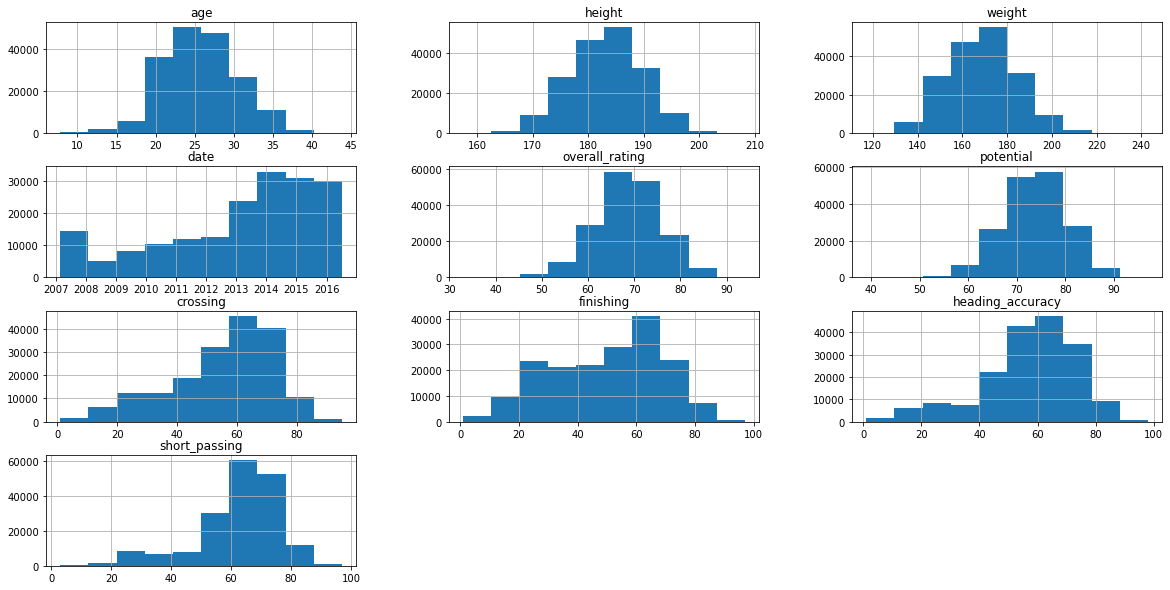

In [44]:
players_df.iloc[:, :15].hist(figsize=(20,10))

array([[<AxesSubplot:title={'center':'volleys'}>,
        <AxesSubplot:title={'center':'dribbling'}>,
        <AxesSubplot:title={'center':'curve'}>],
       [<AxesSubplot:title={'center':'free_kick_accuracy'}>,
        <AxesSubplot:title={'center':'long_passing'}>,
        <AxesSubplot:title={'center':'ball_control'}>],
       [<AxesSubplot:title={'center':'acceleration'}>,
        <AxesSubplot:title={'center':'sprint_speed'}>,
        <AxesSubplot:title={'center':'agility'}>]], dtype=object)

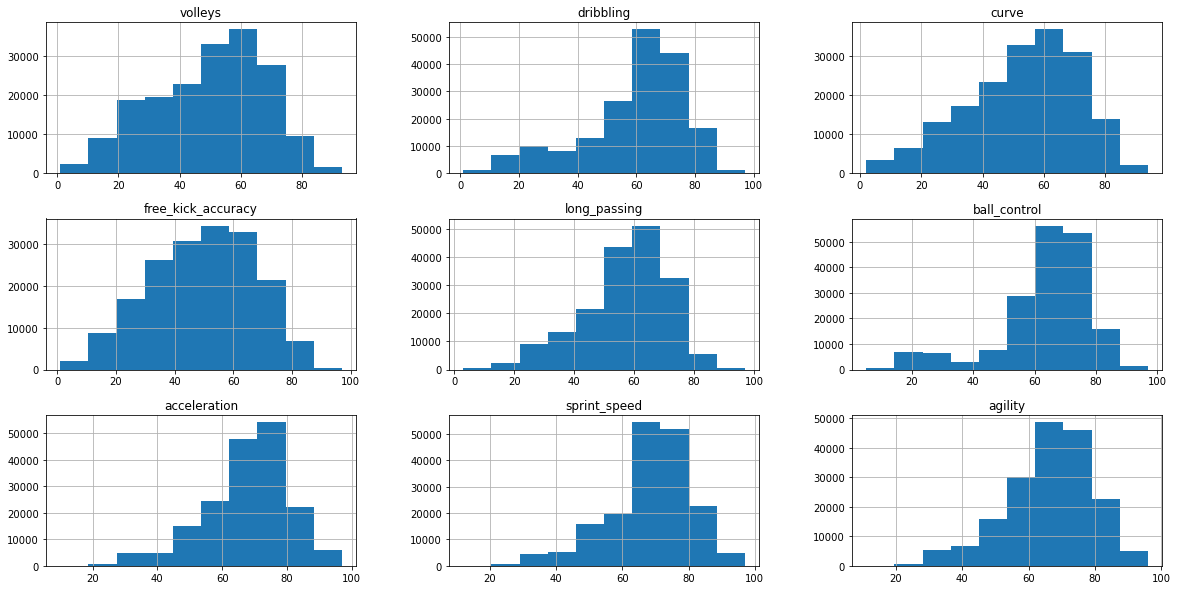

In [45]:
players_df.iloc[:, 15:24].hist(figsize=(20,10))

array([[<AxesSubplot:title={'center':'reactions'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'shot_power'}>],
       [<AxesSubplot:title={'center':'jumping'}>,
        <AxesSubplot:title={'center':'stamina'}>,
        <AxesSubplot:title={'center':'strength'}>],
       [<AxesSubplot:title={'center':'long_shots'}>,
        <AxesSubplot:title={'center':'aggression'}>,
        <AxesSubplot:title={'center':'interceptions'}>]], dtype=object)

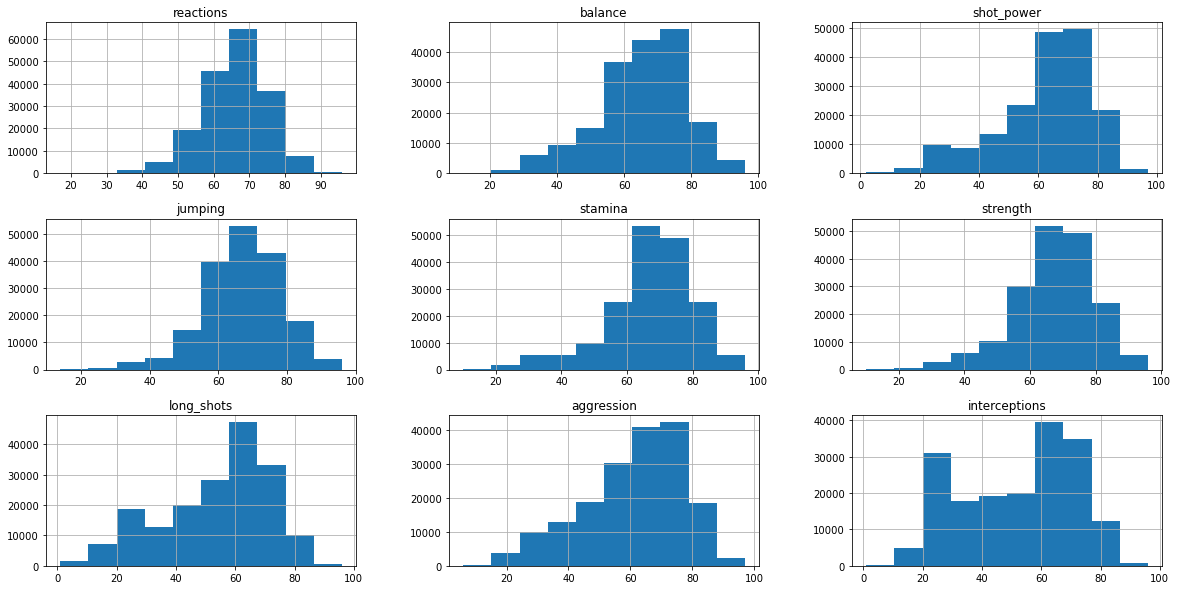

In [46]:
players_df.iloc[:, 24:33].hist(figsize=(20,10))

array([[<AxesSubplot:title={'center':'positioning'}>,
        <AxesSubplot:title={'center':'vision'}>,
        <AxesSubplot:title={'center':'penalties'}>],
       [<AxesSubplot:title={'center':'marking'}>,
        <AxesSubplot:title={'center':'standing_tackle'}>,
        <AxesSubplot:title={'center':'sliding_tackle'}>],
       [<AxesSubplot:title={'center':'gk_diving'}>,
        <AxesSubplot:title={'center':'gk_handling'}>,
        <AxesSubplot:title={'center':'gk_kicking'}>],
       [<AxesSubplot:title={'center':'gk_positioning'}>,
        <AxesSubplot:title={'center':'gk_reflexes'}>, <AxesSubplot:>]],
      dtype=object)

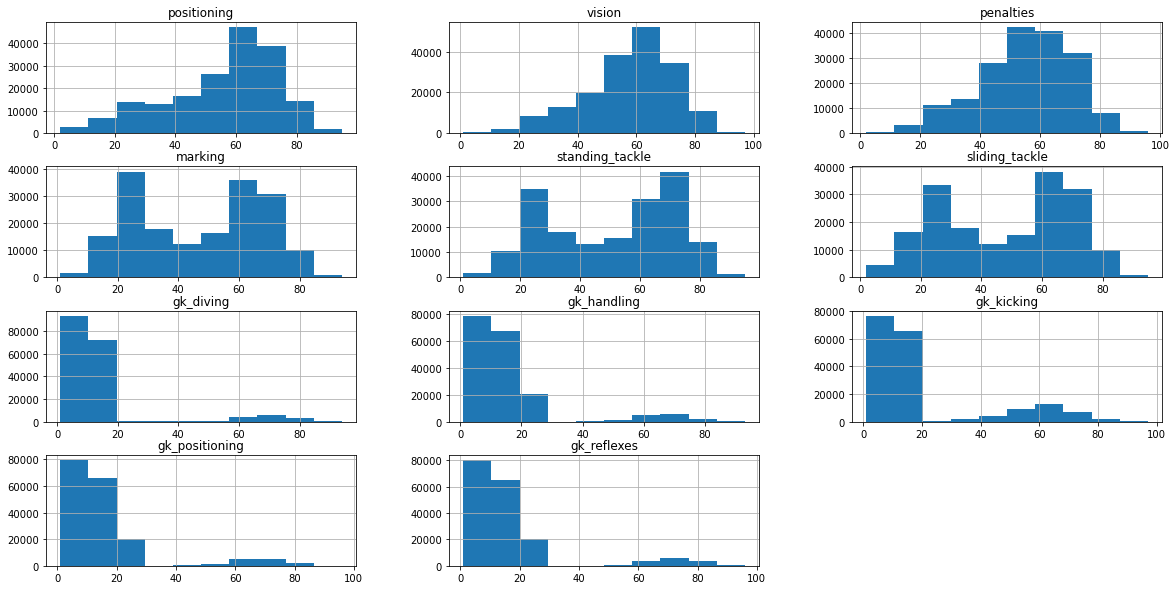

In [47]:
players_df.iloc[:, 33:].hist(figsize=(20,10))

<AxesSubplot:>

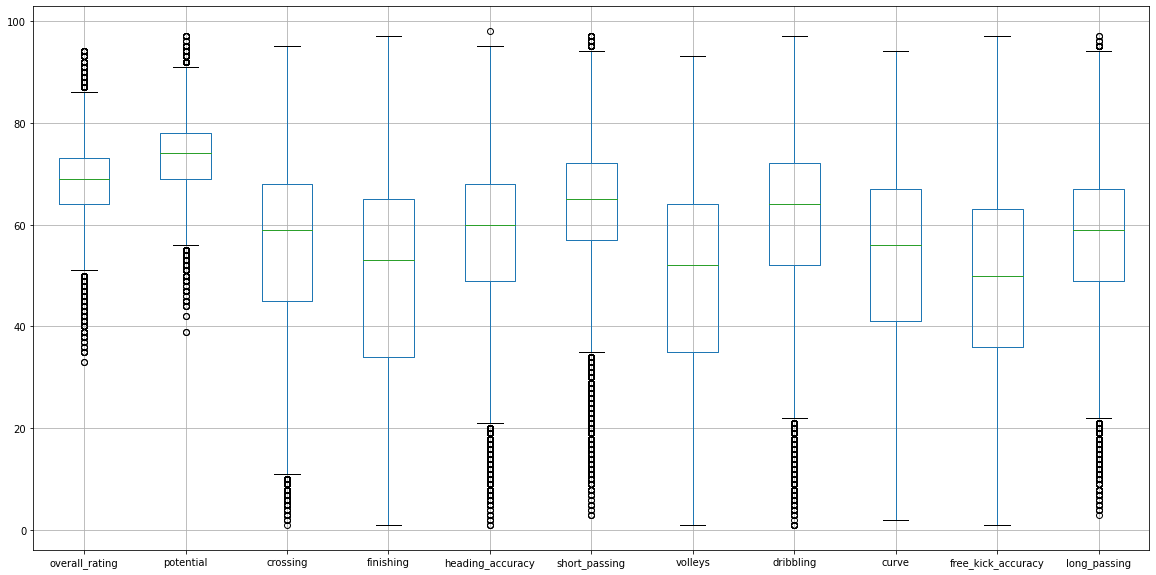

In [48]:
players.iloc[:, 5:20].boxplot(figsize=(20,10))

<AxesSubplot:>

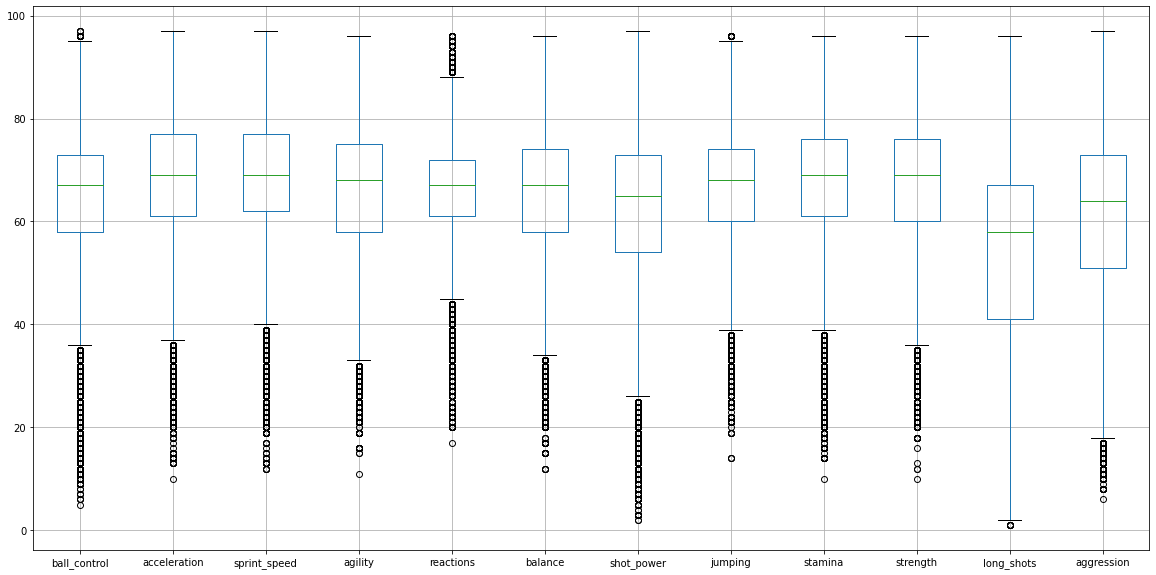

In [49]:
players.iloc[:, 20:32].boxplot(figsize=(20,10))

<AxesSubplot:>

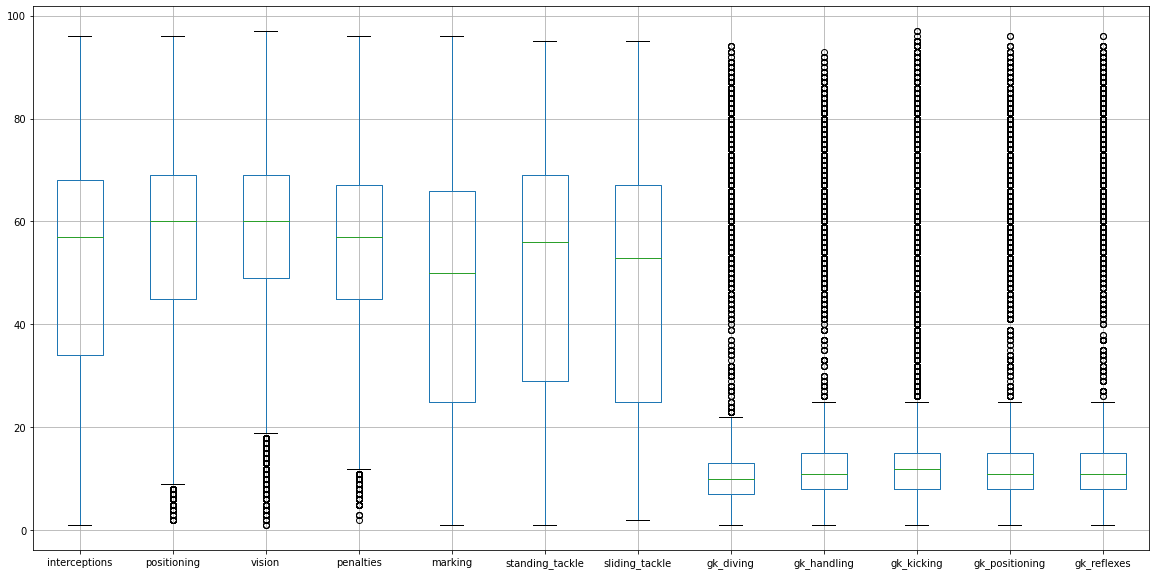

In [50]:
players.iloc[:, 32:].boxplot(figsize=(20,10))

##### After exploring patterns of player attributes:
* It seems to be there are a lot of outliers in almost all attributes, but actually, they are no outliers.
* The thing is that there is a very important missing factor in these comparisons which is the position of the players or in other way the role of its player in the game.
* As the attributes of defenders will not be like the forwards, and attributes of gool keepers will differ from those of midfielders. Of course, they might share some like (‘agility', 'reactions', 'balance', 'jumping', 'stamina', 'strength', 'aggression') but still there are big gaps between them.
* The funny thing is that the outliers in all gool keeping attributes (gk_diving to gk_reflexes) are the data of the actual gool keepers which we should explore and study, not get rid of. Also, they are shown as  outliers because the ratio of goal keepers is about (3/23) of each team.
* So, this is a big limitation in this dataset, not mentioning the player role in the field beside his attributes to enable us to filter by roles and get accurate and efficient analysis.

In [51]:
players_df.groupby('player').mean().sort_values('potential', ascending=False)[:10]

,age,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
player,,,,,,,,,,,,,,,,,,,,,
Lionel Messi,25.215385,170.18,159.0,92.192308,95.230769,83.346154,92.230769,69.269231,88.807692,87.538462,...,90.269231,80.153846,18.769231,21.846154,20.115385,6.461538,12.653846,29.461538,15.076923,10.615385
Cristiano Ronaldo,27.404000,185.42,176.0,91.280000,93.480000,83.880000,91.120000,85.520000,82.280000,85.560000,...,80.680000,83.600000,22.120000,30.840000,23.000000,7.480000,12.960000,28.440000,15.160000,12.760000
Neymar,21.176000,175.26,150.0,83.800000,90.760000,70.320000,83.480000,63.320000,75.680000,81.240000,...,76.840000,79.760000,21.000000,26.960000,33.000000,8.760000,10.560000,20.400000,15.840000,12.320000
Andres Iniesta,27.980000,170.18,150.0,88.320000,90.560000,83.720000,72.680000,55.320000,93.880000,74.000000,...,92.920000,71.120000,58.240000,59.680000,56.000000,6.760000,14.720000,26.040000,14.520000,10.000000
Mario Goetze,21.297059,175.26,159.0,83.176471,90.147059,72.529412,75.794118,53.470588,84.970588,78.617647,...,84.294118,66.705882,20.617647,30.558824,28.000000,13.294118,7.882353,14.647059,6.941176,10.705882
Zlatan Ibrahimovic,30.066667,195.58,209.0,88.285714,90.047619,72.380952,90.000000,79.714286,84.238095,90.047619,...,82.619048,88.000000,20.904762,43.809524,26.809524,12.666667,17.142857,24.714286,13.238095,15.142857
James Rodriguez,21.972727,180.34,165.0,83.000000,89.954545,81.272727,78.045455,67.136364,81.636364,77.409091,...,85.363636,80.590909,30.227273,39.318182,33.636364,15.000000,15.000000,15.000000,5.000000,14.000000
Franck Ribery,29.262500,170.18,159.0,88.458333,89.916667,85.166667,77.750000,48.541667,87.791667,82.041667,...,86.958333,81.500000,18.708333,25.083333,26.000000,13.333333,8.541667,22.833333,9.500000,11.708333
Manuel Neuer,26.679310,193.04,203.0,85.862069,89.655172,18.689655,17.931034,21.241379,38.965517,14.137931,...,37.206897,44.448276,18.448276,19.275862,15.689655,86.482759,81.620690,86.413793,82.586207,86.310345


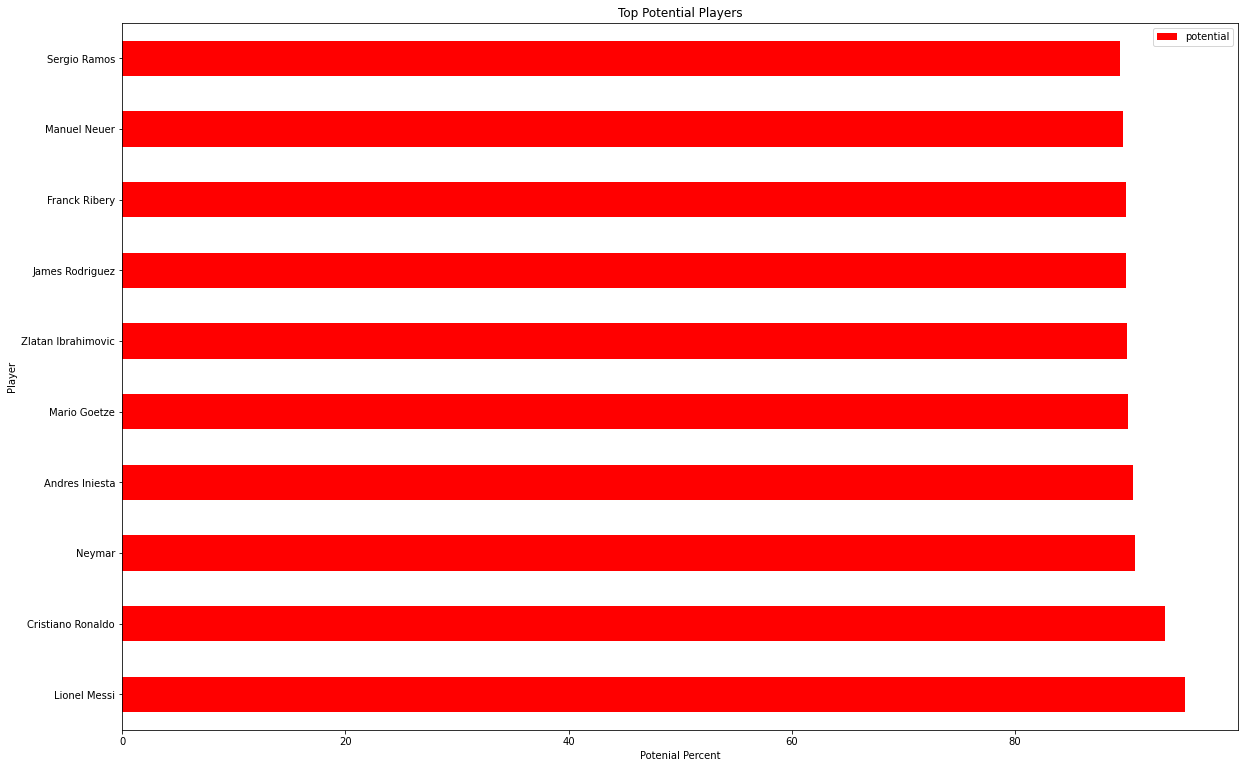

player
Lionel Messi          95.230769
Cristiano Ronaldo     93.480000
Neymar                90.760000
Andres Iniesta        90.560000
Mario Goetze          90.147059
Zlatan Ibrahimovic    90.047619
James Rodriguez       89.954545
Franck Ribery         89.916667
Manuel Neuer          89.655172
Sergio Ramos          89.421053
Name: potential, dtype: float64

In [52]:
top_potential = (players_df.groupby('player')['potential']
                            .mean()
                            .sort_values(ascending=False)[:10])
plotting_bar(top_potential,
             "Top Potential Players",
             'Player', 'Potenial Percent',
             'autumn', horizontal= True)
top_potential

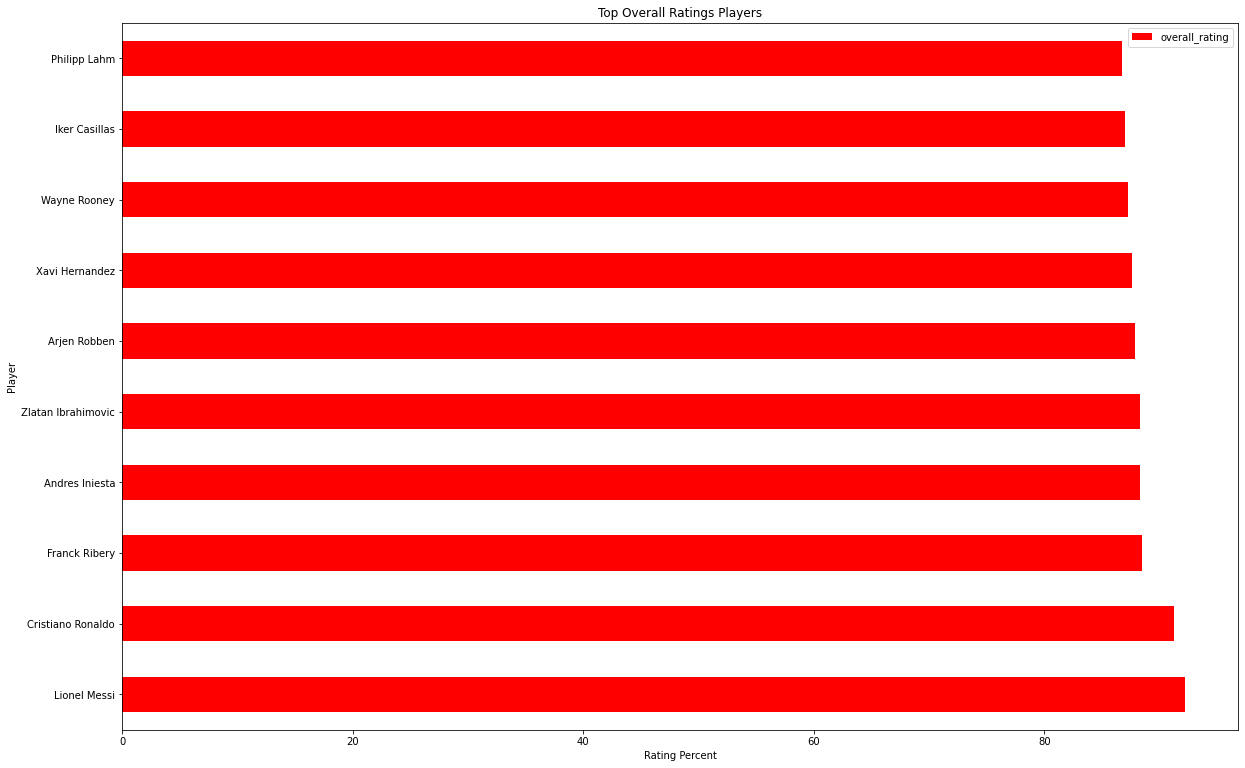

player
Lionel Messi          92.192308
Cristiano Ronaldo     91.280000
Franck Ribery         88.458333
Andres Iniesta        88.320000
Zlatan Ibrahimovic    88.285714
Arjen Robben          87.840000
Xavi Hernandez        87.636364
Wayne Rooney          87.222222
Iker Casillas         86.954545
Philipp Lahm          86.733333
Name: overall_rating, dtype: float64

In [53]:
top_rating = (players_df.groupby('player')['overall_rating']
                        .mean()
                        .sort_values(ascending=False)[:10])
plotting_bar(top_rating,
             "Top Overall Ratings Players", 'Player',
             'Rating Percent', 'autumn', horizontal=True)
top_rating

* It looks like "Lionel Messi" & "Cristiano Ronaldo" are sitting on top of both lists
* But there are so many attributes to check, so let's compare the average attributes of the top 5 rating players & the top 5 potential players to the average attributes of other players

In [54]:
average_pl = players_df.mean(numeric_only=True)
average_pl

age                    25.656064
height                181.877895
weight                168.774593
overall_rating         68.635317
potential              73.479457
crossing               55.142071
finishing              49.962136
heading_accuracy       57.263476
short_passing          62.486726
volleys                49.488927
dribbling              59.265755
curve                  53.001408
free_kick_accuracy     49.392783
long_passing           57.084578
ball_control           63.453846
acceleration           67.709405
sprint_speed           68.101628
agility                65.995082
reactions              66.148297
balance                65.190082
shot_power             61.866474
jumping                66.977333
stamina                67.053401
strength               67.432477
long_shots             53.387560
aggression             60.946217
interceptions          51.897374
positioning            55.730730
vision                 57.868176
penalties              54.933448
marking   

In [55]:
av_best5_potential = (players_df.groupby('player')
                                .mean()
                                .sort_values('potential', ascending=False)[:5]
                                .mean())
av_best5_rating = (players_df.groupby('player')
                             .mean()
                             .sort_values('overall_rating', ascending=False)[:5]
                             .mean())

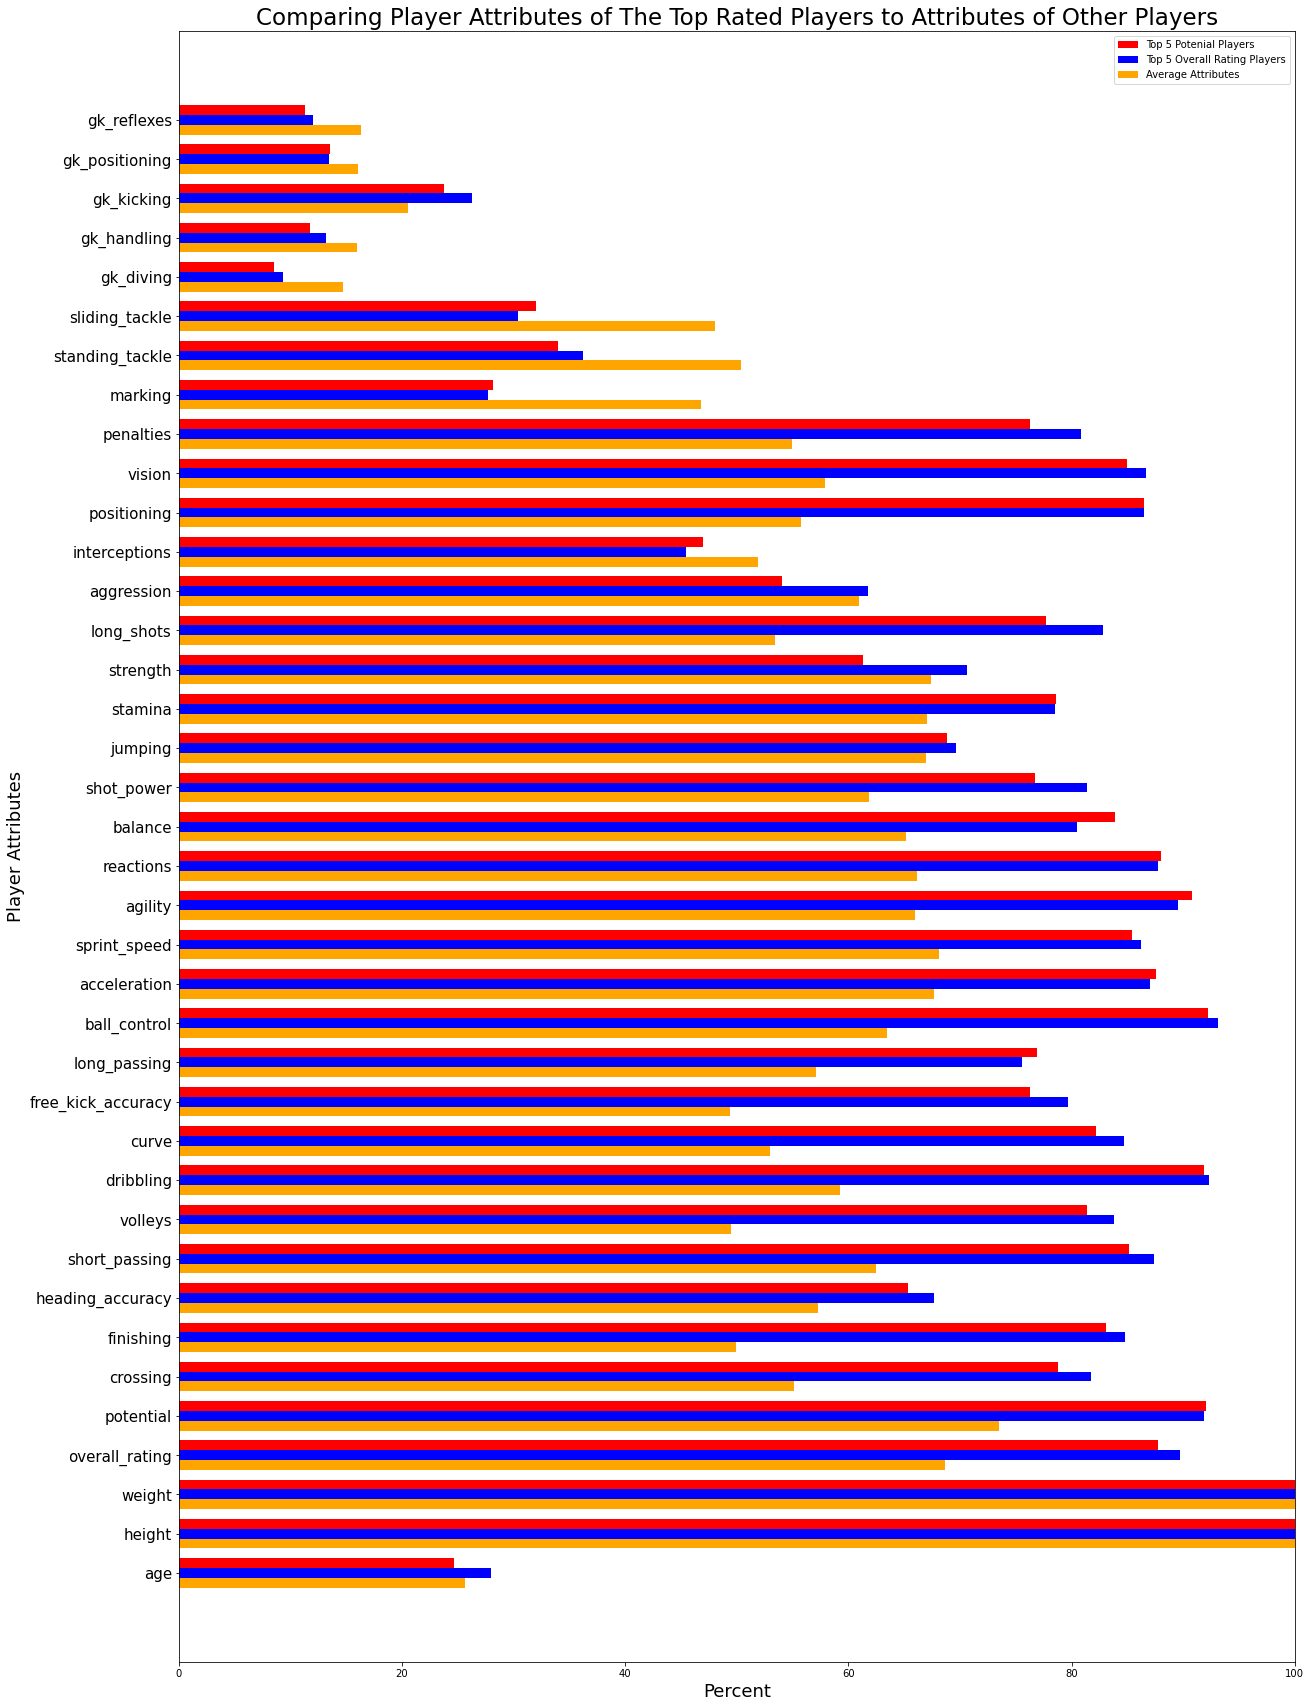

In [56]:
fig0 = plt.figure(figsize = (20, 30)) 
ax0 = fig0.add_subplot()
ind0 = np.arange(len(average_pl))

plt.barh(ind0+0.25, av_best5_potential, color ='red', height = 0.25, label='Top 5 Potenial Players')
plt.barh(ind0, av_best5_rating, color ='blue', height = 0.25, label='Top 5 Overall Rating Players')
plt.barh(ind0-0.25, average_pl, color ='orange', height = 0.25, label='Average Attributes')

ax0.set_yticks(ind0)
ax0.set_yticklabels(average_pl.index.tolist())
plt.yticks(fontsize=15)
plt.ylabel("Player Attributes", fontsize=18)
plt.xlim(0,100)
plt.xlabel("Percent", fontsize=18)
plt.title("Comparing Player Attributes of The Top Rated Players to Attributes of Other Players", fontsize=23)
plt.legend()
plt.show();

* It looks like that top rated players are higher than other players in almost all attributes except the gool keeping ones.
* But the most unique attributes are **Dribbling**, **Ball Control**, **Agility**, **Reactions** & **Short Passing**.

### Research Question 2: What teams attributes lead to most goals scoring & most defeated teams?

#### 1) First, we will modify 'match_df' dataframe to obtain points, goals, victories and losses for each team
#### 2) Then, we will find the teams matching our criteria
#### 3) Finally, we will find the attributes of those teams from 'teams_df' dataframe

In [57]:
points_df = match_df.loc[:, ['league', 'season', 'home_team', 'away_team',
                                    'home_goal', 'away_goal']]
    # Creating Masks
home_team_wins = points_df.home_goal > points_df.away_goal
away_team_wins = points_df.away_goal > points_df.home_goal
draw = points_df.home_goal == points_df.away_goal
    # Set Points Conditions & Choices
home_points_conditions = [home_team_wins, draw]
away_points_conditions = [away_team_wins, draw]
points_choices = [3, 1]

points_df['home_point'] = np.select(home_points_conditions, points_choices, 0)
points_df['away_point'] = np.select(away_points_conditions, points_choices, 0)
points_df['home_win'] = np.select([home_team_wins], [1], 0)
points_df['away_win'] = np.select([away_team_wins], [1], 0)
points_df['home_draw'] = np.select([draw], [1], 0)
points_df['away_draw'] = np.select([draw], [1], 0)
points_df['home_loss'] = np.select([away_team_wins], [1], 0)
points_df['away_loss'] = np.select([home_team_wins], [1], 0)

points_df.head(2)

,league,season,home_team,away_team,home_goal,away_goal,home_point,away_point,home_win,away_win,home_draw,away_draw,home_loss,away_loss
0,Belgium Jupiler League,2008/2009,KRC Genk,Beerschot AC,1,1,1,1,0,0,1,1,0,0
1,Belgium Jupiler League,2008/2009,SV Zulte-Waregem,Sporting Lokeren,0,0,1,1,0,0,1,1,0,0


In [58]:
home_points = points_df.loc[:, ['league', 'season', 'home_team', 'home_point', 'home_win',
                                'home_draw', 'home_loss', 'home_goal', 'away_goal']]
home_points.rename(columns={'home_team': 'team', 'home_goal':'h_goals', 'away_goal':'h_goal_conceded'}, inplace=True)

home_table = home_points.groupby(['team', 'league', 'season']).sum()

away_points = points_df.loc[:, ['league', 'season', 'away_team', 'away_point', 'away_win',
                                'away_draw', 'away_loss', 'away_goal', 'home_goal']]
away_points.rename(columns={'away_team': 'team', 'away_goal':'a_goals', 'home_goal':'a_goal_conceded'}, inplace=True)

away_table = away_points.groupby(['team', 'league', 'season']).sum()

In [59]:
home_table

home_point  home_win  \
team                 league                season                            
1. FC Kaiserslautern Germany 1. Bundesliga 2010/2011          24         6   
                                           2011/2012          11         2   
1. FC Köln           Germany 1. Bundesliga 2008/2009          17         4   
                                           2009/2010          15         3   
                                           2010/2011          35        11   
...                                                          ...       ...   
Śląsk Wrocław        Poland Ekstraklasa    2011/2012          29         9   
                                           2012/2013          31         9   
                                           2013/2014          21         5   
                                           2014/2015          31         9   
                                           2015/2016          21         5   

                                                      home_draw  home_loss  \
team                 league                season                            
1. FC Kaiserslautern Germany 1. Bundesliga 2010/2011          6          5   
                                           2011/2012          5         10   
1. FC Köln           Germany 1. Bundesliga 2008/2009          5          8   
                                           2009/2010          6          8   
                                           2010/2011          2          4   
...                                                         ...        ...   
Śląsk Wrocław        Poland Ekstraklasa    2011/2012          2          4   
                                           2012/2013          4          2   
                                           2013/2014          6          4   
                                           2014/2015          4          2   
                                           2015/2016          6          4   

                                                      h_goals  h_goal_conceded  
team                 league                season                               
1. FC Kaiserslautern Germany 1. Bundesliga 2010/2011       25               19  
                                           2011/2012       12               28  
1. FC Köln           Germany 1. Bundesliga 2008/2009       14               25  
                                           2009/2010       18               29  
                                           2010/2011       30               21  
...                                                       ...              ...  
Śląsk Wrocław        Poland Ekstraklasa    2011/2012       26               14  
                                           2012/2013       23               15  
                                           2013/2014       21               16  
                                           2014/2015       21                9  
                                           2015/2016       14               14  

[1478 rows x 6 columns]

In [60]:
away_table

away_point  away_win  \
team                 league                season                            
1. FC Kaiserslautern Germany 1. Bundesliga 2010/2011          22         7   
                                           2011/2012          12         2   
1. FC Köln           Germany 1. Bundesliga 2008/2009          22         7   
                                           2009/2010          23         6   
                                           2010/2011           9         2   
...                                                          ...       ...   
Śląsk Wrocław        Poland Ekstraklasa    2011/2012          27         8   
                                           2012/2013          16         4   
                                           2013/2014          13         2   
                                           2014/2015          15         3   
                                           2015/2016          13         3   

                                                      away_draw  away_loss  \
team                 league                season                            
1. FC Kaiserslautern Germany 1. Bundesliga 2010/2011          1          9   
                                           2011/2012          6          9   
1. FC Köln           Germany 1. Bundesliga 2008/2009          1          9   
                                           2009/2010          5          6   
                                           2010/2011          3         12   
...                                                         ...        ...   
Śląsk Wrocław        Poland Ekstraklasa    2011/2012          3          4   
                                           2012/2013          4          7   
                                           2013/2014          7          6   
                                           2014/2015          6          6   
                                           2015/2016          4          8   

                                                      a_goals  a_goal_conceded  
team                 league                season                               
1. FC Kaiserslautern Germany 1. Bundesliga 2010/2011       23               32  
                                           2011/2012       12               26  
1. FC Köln           Germany 1. Bundesliga 2008/2009       21               25  
                                           2009/2010       15               13  
                                           2010/2011       17               41  
...                                                       ...              ...  
Śląsk Wrocław        Poland Ekstraklasa    2011/2012       21               17  
                                           2012/2013       21               27  
                                           2013/2014       17               24  
                                           2014/2015       22               27  
                                           2015/2016       14               23  

[1478 rows x 6 columns]

In [61]:
points = pd.concat([home_table, away_table], axis=1)

points['points'] = points.home_point + points.away_point
points['win'] = points.home_win + points.away_win
points['draw'] = points.home_draw + points.away_draw
points['loss'] = points.home_loss + points.away_loss
points['goals'] = points.h_goals + points.a_goals
points['goals_conceded'] = points.h_goal_conceded + points.a_goal_conceded
points['match_played'] = points.win + points.draw + points.loss

points.drop(columns=['home_point', 'home_win', 'home_draw', 'home_loss', 'h_goals', 'h_goal_conceded',
                    'away_point', 'away_win', 'away_draw', 'away_loss', 'a_goals', 'a_goal_conceded'], inplace=True)

points.reset_index(inplace=True)
points

,team,league,season,points,win,draw,loss,goals,goals_conceded,match_played
0,1. FC Kaiserslautern,Germany 1. Bundesliga,2010/2011,46,13,7,14,48,51,34
1,1. FC Kaiserslautern,Germany 1. Bundesliga,2011/2012,23,4,11,19,24,54,34
2,1. FC Köln,Germany 1. Bundesliga,2008/2009,39,11,6,17,35,50,34
3,1. FC Köln,Germany 1. Bundesliga,2009/2010,38,9,11,14,33,42,34
4,1. FC Köln,Germany 1. Bundesliga,2010/2011,44,13,5,16,47,62,34
...,...,...,...,...,...,...,...,...,...,...
1473,Śląsk Wrocław,Poland Ekstraklasa,2011/2012,56,17,5,8,47,31,30
1474,Śląsk Wrocław,Poland Ekstraklasa,2012/2013,47,13,8,9,44,42,30
1475,Śląsk Wrocław,Poland Ekstraklasa,2013/2014,34,7,13,10,38,40,30
1476,Śląsk Wrocław,Poland Ekstraklasa,2014/2015,46,12,10,8,43,36,30


##### a) Finding the most goals scoring teams

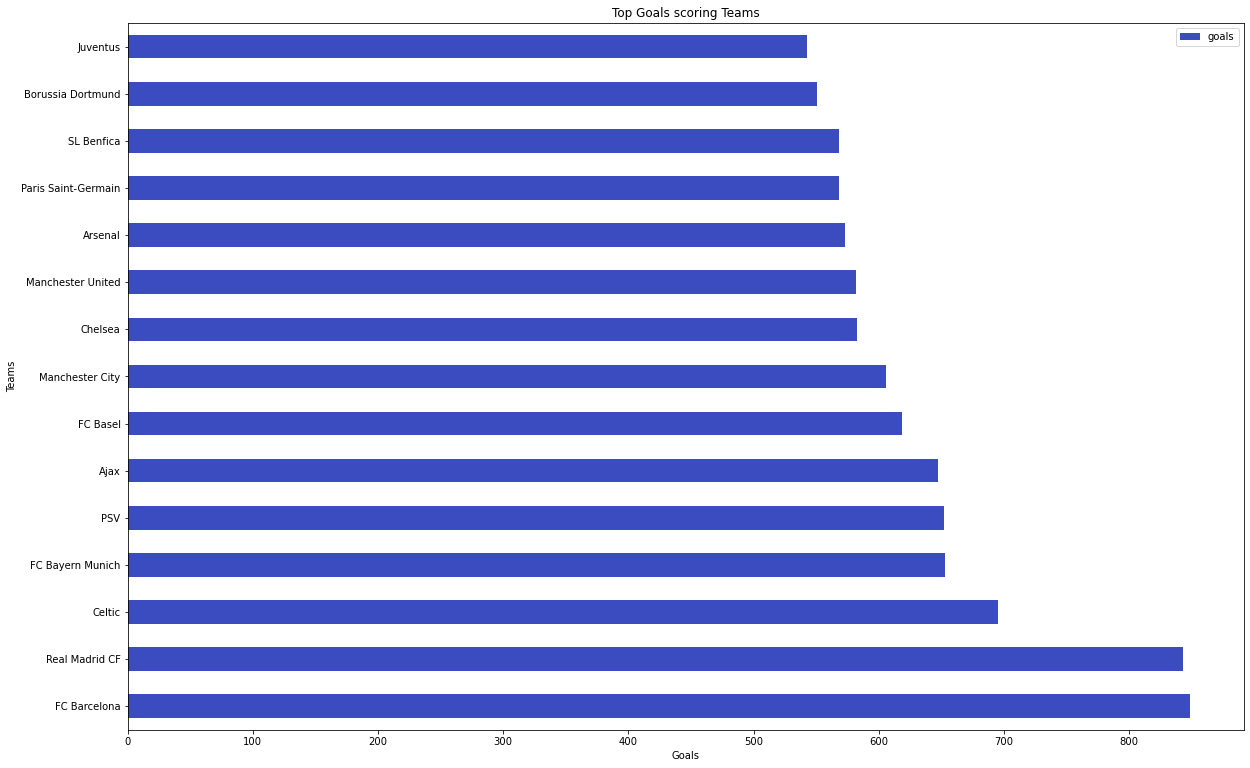

team
FC Barcelona           849
Real Madrid CF         843
Celtic                 695
FC Bayern Munich       653
PSV                    652
Ajax                   647
FC Basel               619
Manchester City        606
Chelsea                583
Manchester United      582
Arsenal                573
Paris Saint-Germain    568
SL Benfica             568
Borussia Dortmund      551
Juventus               543
Name: goals, dtype: int64

In [62]:
most_scoring = (points.groupby(['team'])['goals']
                      .sum()
                      .sort_values(ascending=False).iloc[:15])
plotting_bar(most_scoring,
             "Top Goals scoring Teams",
             'Teams', 'Goals', horizontal=True)
most_scoring

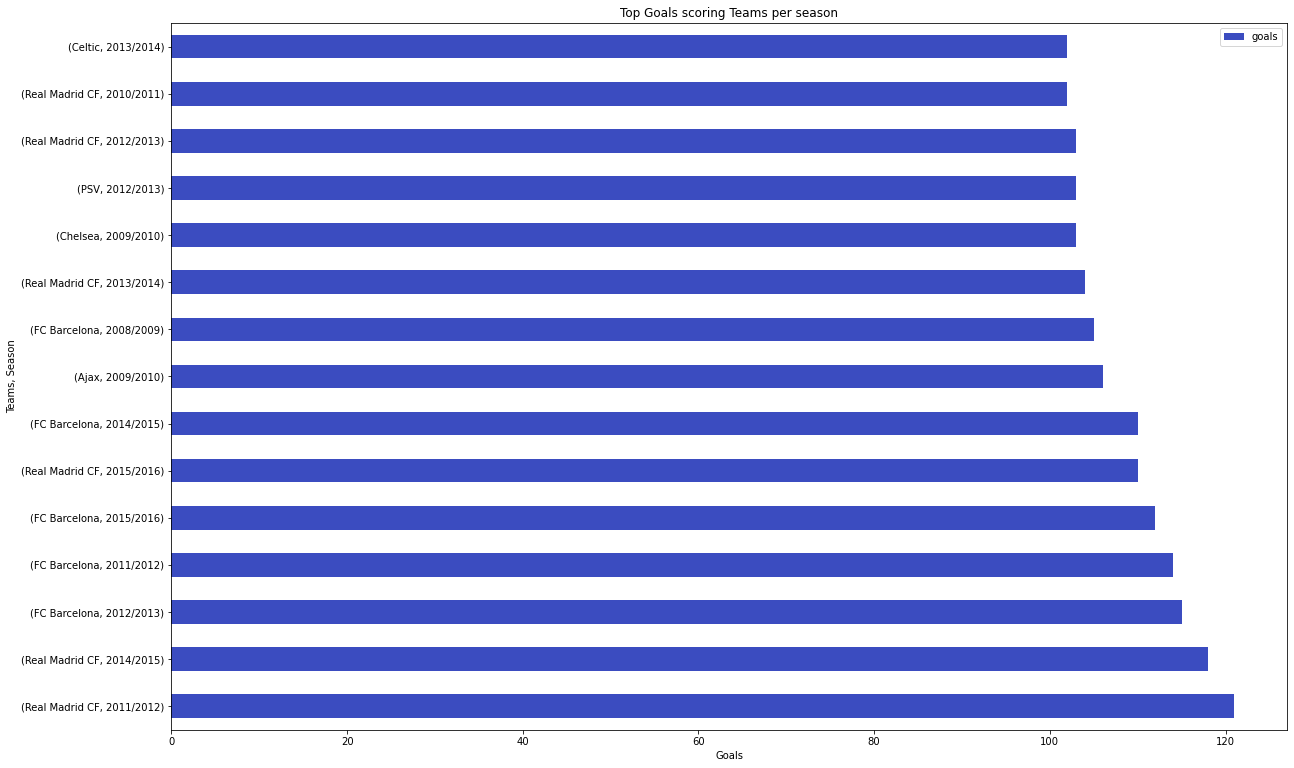

team            season   
Real Madrid CF  2011/2012    121
                2014/2015    118
FC Barcelona    2012/2013    115
                2011/2012    114
                2015/2016    112
Real Madrid CF  2015/2016    110
FC Barcelona    2014/2015    110
Ajax            2009/2010    106
FC Barcelona    2008/2009    105
Real Madrid CF  2013/2014    104
Chelsea         2009/2010    103
PSV             2012/2013    103
Real Madrid CF  2012/2013    103
                2010/2011    102
Celtic          2013/2014    102
Name: goals, dtype: int64

In [63]:
most_scoring_per_season = (points.groupby(['team', 'season'])['goals']
                                  .sum()
                                  .sort_values(ascending=False)[:15])
plotting_bar(most_scoring_per_season,
             "Top Goals scoring Teams per season",
             'Teams, Season', 'Goals', horizontal=True)
most_scoring_per_season

* It looks like "FC Barcelona" & "Real Madrid CF" have beated all teams in scoring goals especially in season 2011/2012
* So, let's compare their attributes with the mean attributes of all teams

In [64]:
average_atr = teams_df.mean(numeric_only=True)
average_atr

buildUpPlaySpeed          52.463967
buildUpPlayDribbling      36.563830
buildUpPlayPassing        48.489362
chanceCreationPassing     52.166781
chanceCreationCrossing    53.734386
chanceCreationShooting    53.971860
defencePressure           46.017845
defenceAggression         49.253946
defenceTeamWidth          52.187371
dtype: float64

In [65]:
barca_atr = (teams_df.groupby('team').get_group('FC Barcelona')
                                     .mean(numeric_only=True))
barca_atr

buildUpPlaySpeed          35.833333
buildUpPlayDribbling      32.000000
buildUpPlayPassing        34.000000
chanceCreationPassing     45.166667
chanceCreationCrossing    33.333333
chanceCreationShooting    53.000000
defencePressure           64.333333
defenceAggression         54.500000
defenceTeamWidth          66.500000
dtype: float64

In [66]:
real_atr = (teams_df.groupby('team').get_group('Real Madrid CF')
                                    .mean(numeric_only=True))
real_atr

buildUpPlaySpeed          50.666667
buildUpPlayDribbling      38.833333
buildUpPlayPassing        38.666667
chanceCreationPassing     67.500000
chanceCreationCrossing    53.833333
chanceCreationShooting    69.000000
defencePressure           52.000000
defenceAggression         52.166667
defenceTeamWidth          63.500000
dtype: float64

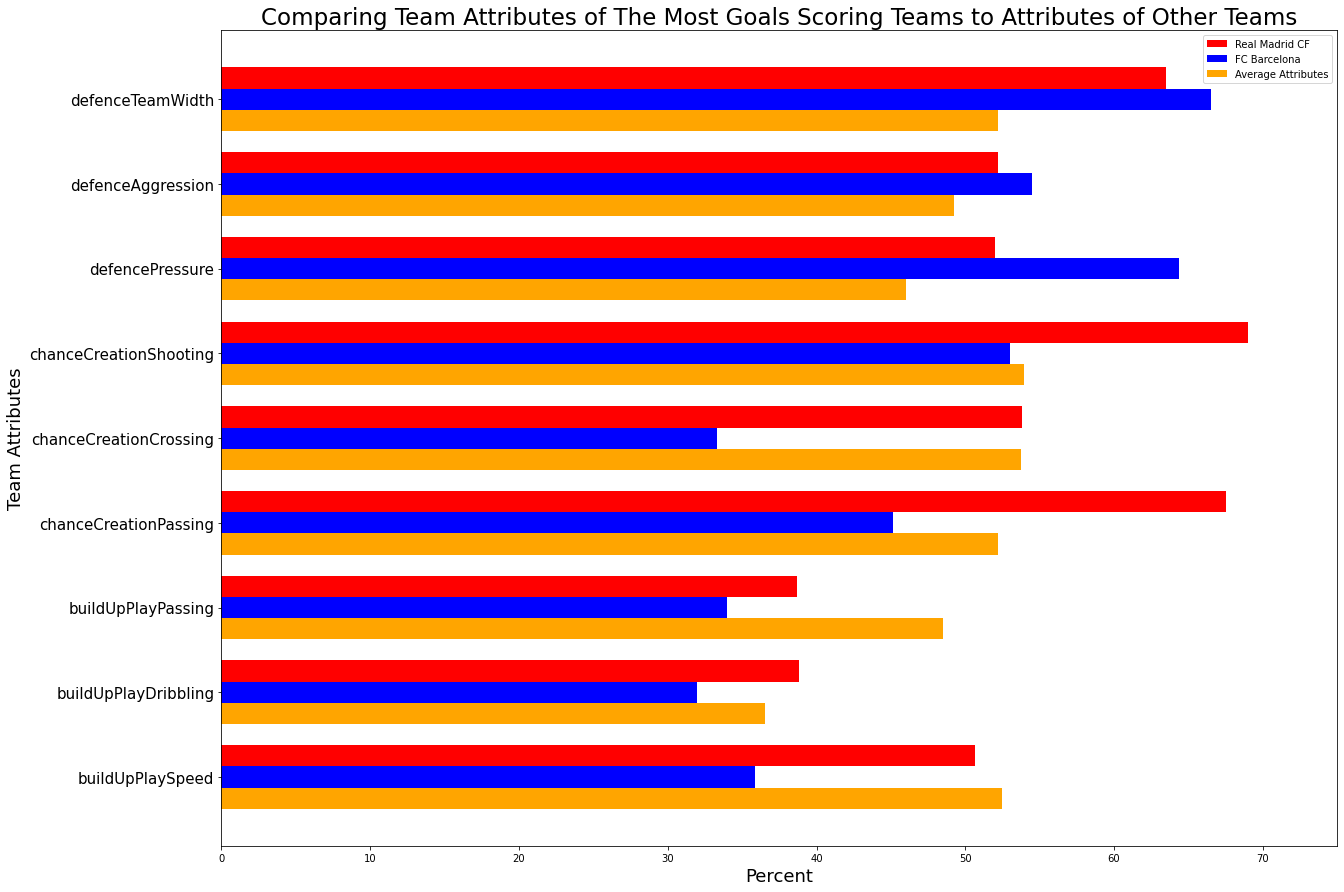

In [67]:
fig1 = plt.figure(figsize = (20, 15)) 
ax1 = fig1.add_subplot()
ind1 = np.arange(len(average_atr))

plt.barh(ind1+0.25, real_atr, color ='red', height = 0.25, label='Real Madrid CF')
plt.barh(ind1, barca_atr, color ='blue', height = 0.25, label='FC Barcelona')
plt.barh(ind1-0.25, average_atr, color ='orange', height = 0.25, label='Average Attributes')

ax1.set_yticks(ind1)
ax1.set_yticklabels(average_atr.index.tolist())
plt.yticks(fontsize=15)
plt.ylabel("Team Attributes", fontsize=18)
plt.xlim(0,75)
plt.xlabel("Percent", fontsize=18)
plt.title("Comparing Team Attributes of The Most Goals Scoring Teams to Attributes of Other Teams", fontsize=23)
plt.legend()
plt.show();

* It looks like Real Madrid & Barcelona has two common attributes that differ from other teams: *__Mixed__* **Build Up Play Passing** & *__almost Wide__* **high Defence Team Width**
* But Real Madrid differs from all teams in that it has *__Rsiky__* **Chance Creation passing** & *__Lots__* **Chance Creation Shooting** which of course lead to scoring more goals.

##### b) Finding the most defeated teams

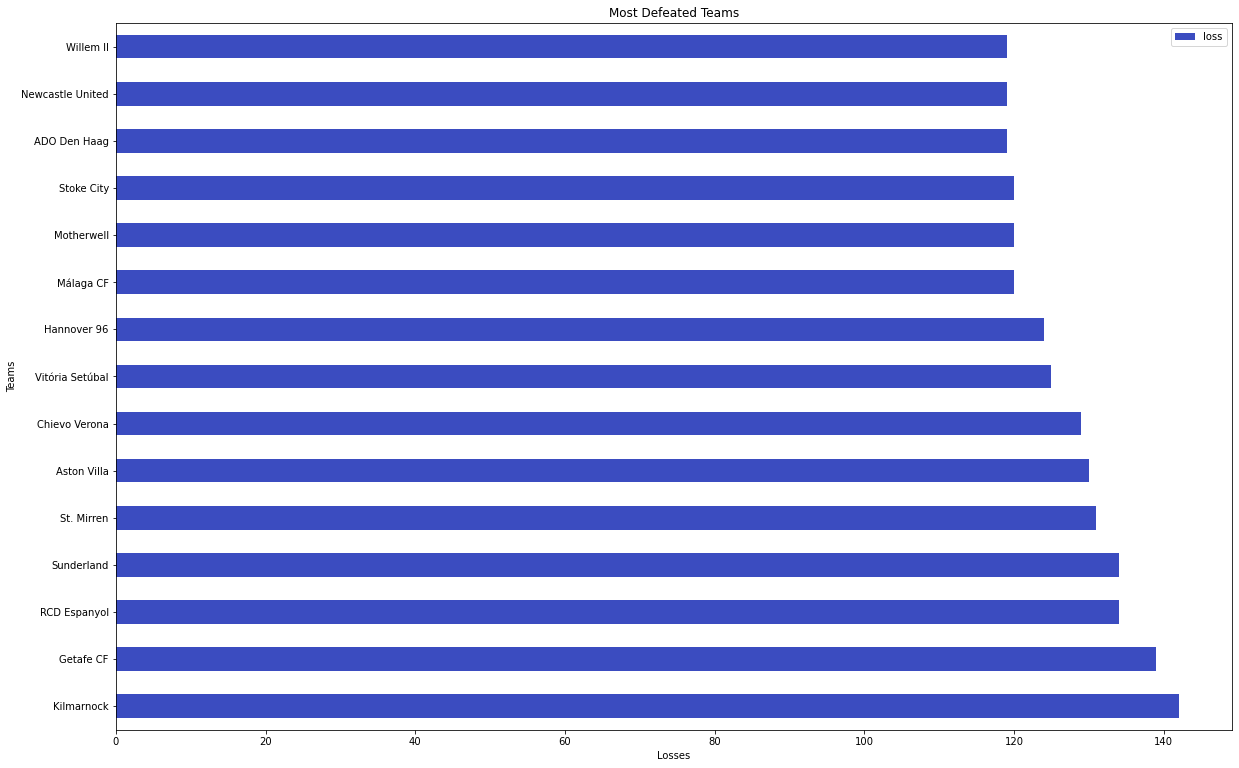

team
Kilmarnock          142
Getafe CF           139
RCD Espanyol        134
Sunderland          134
St. Mirren          131
Aston Villa         130
Chievo Verona       129
Vitória Setúbal     125
Hannover 96         124
Málaga CF           120
Motherwell          120
Stoke City          120
ADO Den Haag        119
Newcastle United    119
Willem II           119
Name: loss, dtype: int32

In [68]:
most_defeated = (points.groupby(['team'])['loss']
                       .sum()
                       .sort_values(ascending=False)[:15])
plotting_bar(most_defeated,
             "Most Defeated Teams",
             'Teams', 'Losses', horizontal=True)
most_defeated

* ##### Let's compare the attributes of the top 3 defeated teams with the mean attributes of all teams

In [69]:
kilm_atr = (teams_df.groupby('team')
                    .get_group('Kilmarnock')
                    .mean(numeric_only=True))
kilm_atr

buildUpPlaySpeed          53.500000
buildUpPlayDribbling      36.666667
buildUpPlayPassing        57.000000
chanceCreationPassing     53.666667
chanceCreationCrossing    55.000000
chanceCreationShooting    50.666667
defencePressure           48.000000
defenceAggression         49.166667
defenceTeamWidth          54.333333
dtype: float64

In [70]:
geta_atr = (teams_df.groupby('team')
                    .get_group('Getafe CF')
                    .mean(numeric_only=True))
geta_atr

buildUpPlaySpeed          34.500000
buildUpPlayDribbling      34.166667
buildUpPlayPassing        39.666667
chanceCreationPassing     50.333333
chanceCreationCrossing    44.833333
chanceCreationShooting    55.333333
defencePressure           48.166667
defenceAggression         41.000000
defenceTeamWidth          51.000000
dtype: float64

In [71]:
sund_atr = (teams_df.groupby('team')
                    .get_group('Sunderland')
                    .mean(numeric_only=True))
sund_atr

buildUpPlaySpeed          57.000000
buildUpPlayDribbling      33.000000
buildUpPlayPassing        60.833333
chanceCreationPassing     56.666667
chanceCreationCrossing    55.333333
chanceCreationShooting    59.000000
defencePressure           43.666667
defenceAggression         52.166667
defenceTeamWidth          51.833333
dtype: float64

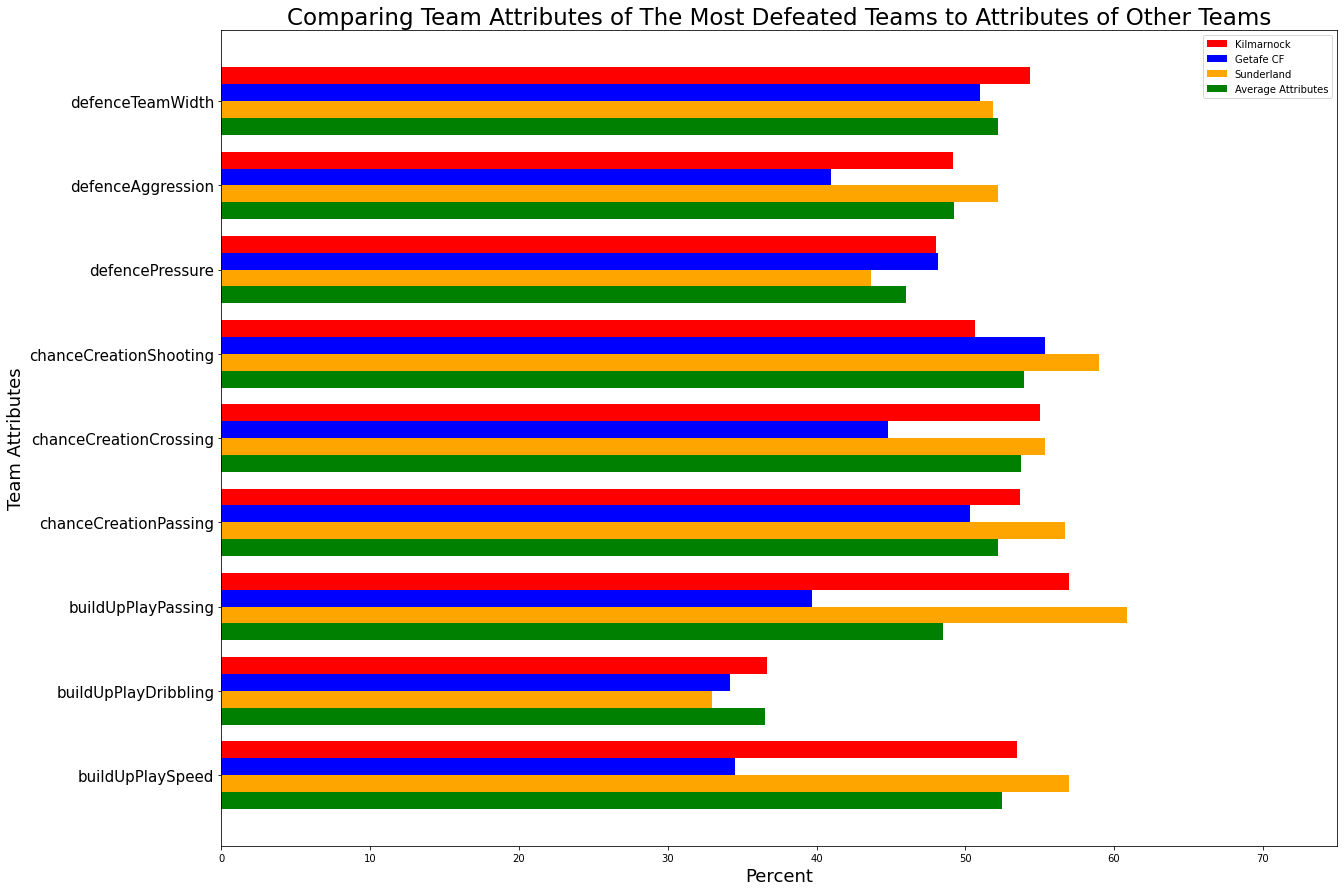

In [72]:
fig2 = plt.figure(figsize = (20, 15)) 
ax2 = fig2.add_subplot()
ind2 = np.arange(len(average_atr))

plt.barh(ind1+0.3, kilm_atr, color ='red', height = 0.2, label='Kilmarnock')
plt.barh(ind1+0.1, geta_atr, color ='blue', height = 0.2, label='Getafe CF')
plt.barh(ind1-0.1, sund_atr, color ='orange', height = 0.2, label='Sunderland')
plt.barh(ind1-0.3, average_atr, color ='green', height = 0.2, label='Average Attributes')

ax2.set_yticks(ind2)
ax2.set_yticklabels(average_atr.index.tolist())
plt.yticks(fontsize=15)
plt.ylabel("Team Attributes", fontsize=18)
plt.xlim(0,75)
plt.xlabel("Percent", fontsize=18)
plt.title("Comparing Team Attributes of The Most Defeated Teams to Attributes of Other Teams", fontsize=23)
plt.legend()
plt.show();

* It looks like Kilmarnock & Sunderland attributes do not differ much from other teams attributes.
* But Getafe CF does differ in that it has *__Very slow__* **Build Up Play Speed** *__little__* **Chance Creation Crossing** & *__little__* **Defence Aggression** which of course lead to receiving more goals resulting in more defeats.

<a id='conclusions'></a>
## Conclusions

### 1) Limitations in player attributes data:
* It seems to be there are a lot of outliers in almost all attributes, but actually, they are no outliers.
* The thing is that there is a very important missing factor in these comparisons which is the position of the players or in other way the role of its player in the game.
* As the attributes of defenders will not be like the forwards, and attributes of gool keepers will differ from those of midfielders. Of course, they might share some like (‘agility', 'reactions', 'balance', 'jumping', 'stamina', 'strength', 'aggression') but still there are big gaps between them.
* The funny thing is that the outliers in all gool keeping attributes (gk_diving to gk_reflexes) are the data of the actual gool keepers which we should explore and study, not get rid of. Also, they are shown as  outliers because the ratio of goal keepers is about (3/23) of each team.
* So, this is a big limitation in this dataset, not mentioning the player role in the field beside his attributes to enable us to filter by roles and get accurate and efficient analysis.

### 2) Limitations in teams & players data:
* Not knowing whom player belongs to which team is another big limitation in this dataset.
* Even though, if we tried to get players’ teams from “match” data starting players, it will take forever and it will not be accurate.
* Imagine a team with three high potential players compared to another team with 7 high potential players compared to a team with no high potential players, would these conditions affect team results, wins and goals scored through the season?
* I think it will have a big influence, but unfortunately, we cannot make sure of it because lack of data.

### 3) The top potential & overall rating players:
* "Lionel Messi" & "Cristiano Ronaldo" are sitting on top of both lists.
* Top rated players are higher than other players in almost all attributes except the gool keeping ones.
* But the most unique attributes are **Dribbling**, **Ball Control**, **Agility**, **Reactions** & **Short Passing**.

### 4) The most goals scoring teams:
* "FC Barcelona" & "Real Madrid CF" are in the top as in the below figurer from other teams: *__Mixed__* **Build Up Play Passing** & *__almost Wide__* **high Defence Team Width**.
* But "Real Madrid CF" differs from all teams in that it has *__Rsiky__* **Chance Creation passing** & *__Lots__* **Chance Creation Shooting** which of course lead to scoring more goals.

### 5) The most defeated teams:
* "Kilmarnock", "Getafe CF" & "Sunderland" are the top three defeated teams.
* "Kilmarnock" & "Sunderland" attributes do not differ much from other teams attributes.
* But "Getafe CF" does differ in that it has *__Very slow__* **Build Up Play Speed** *__little__* **Chance Creation Crossing** & *__little__* **Defence Aggression** which of course lead to receiving more goals resulting in more defeats.